In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/signapoop/Desktop/fyp-graph-clustering'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pickle 
import numpy as np
import pandas as pd
import torch
import os
from timeit import default_timer as timer
import networkx as nx
import scipy.sparse as sp

In [3]:
from core.SimpleNet import SimpleNet
from core.GraphConvNet import GraphConvNet
from core.EmbeddingDataSet import EmbeddingDataSet
from core.GraphDataBlock import GraphDataBlock
from util.plot_graph_embedding import plot_graph_embedding
from util.evaluation_metrics import evaluate_viz_metrics, trustworthiness, neighborhood_preservation
from util.network_utils import get_net_projection
from util.graph_utils import get_shortest_path_matrix, neighbor_sampling

cuda not available
cuda not available


In [4]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [5]:
if torch.cuda.is_available():
    dtypeFloat = torch.cuda.FloatTensor
    dtypeLong = torch.cuda.LongTensor
    print('cuda available')
    device = 'cuda'
else:
    dtypeFloat = torch.FloatTensor
    dtypeLong = torch.LongTensor
    print('cuda not available')
    device = 'cpu'

cuda not available


In [6]:
dataset_name = 'cora_second_test'
parent_dir = os.path.abspath('..')
input_dir = os.path.join(parent_dir, 'data')
dataset = EmbeddingDataSet(dataset_name, input_dir, train=True)
dataset.create_all_data(n_batches=1, shuffle=False)
dataset.summarise()

Data blocks of length:  [2708]
Time to create all data (s) = 0.0409
Name of dataset = cora_second_test
Input dimension = 1433
Number of training samples = 2708
Training labels = True


In [7]:
net_parameters = {}
net_parameters['n_components'] = 2
net_parameters['D'] = dataset.input_dim # input dimension
net_parameters['L'] = 2 # number of hidden layers

In [8]:
dataset = EmbeddingDataSet(dataset_name, input_dir, train=True)
dataset.create_all_data(n_batches=1, shuffle=False)

Data blocks of length:  [2708]
Time to create all data (s) = 0.0125


In [9]:
# path_matrix = get_shortest_path_matrix(dataset.adj_matrix.toarray())
# print(path_matrix.shape)
# np.save('path_matrix.npy', path_matrix)

## End of boilerplate code

In [10]:
main_dir = os.path.join('results', dataset_name)
main_dir

'results/cora_second_test'

In [11]:
path_matrix = np.load(os.path.join(input_dir, dataset_name) + '/path_matrix.npy')

In [12]:
# Graph net
def load_net_from_root(root, net_parameters):
    net_parameters['H'] = 128 # number of hidden units
    net_1 = GraphConvNet(net_parameters)
    if torch.cuda.is_available(): net_1.cuda()
    filename = os.path.join(root, 'graph_net_144.pkl')
    checkpoint = torch.load(filename, map_location=device)
    net_1.load_state_dict(checkpoint['state_dict'])
    return net_1

In [13]:
def project_and_eval(net, dataset):
    from sklearn.metrics import silhouette_score
    y_pred = get_net_projection(net, dataset)
    res = evaluate_viz_metrics(y_pred, dataset)
    res['Feature trustworthiness'] = trustworthiness(dataset.inputs, y_pred, metric='cosine')
    res['Graph trustworthiness'] = neighborhood_preservation(y_pred, path_matrix)
    res['Silhouette score'] = silhouette_score(y_pred, dataset.labels)
    return res

In [14]:
from collections import defaultdict

res_summary = defaultdict(list)
test_range = [1, 6, 11]
for i in test_range:
    root = os.path.join(main_dir, dataset_name) + '_' + str(i)
    net = load_net_from_root(root, net_parameters)
    res = project_and_eval(net, dataset)
    for k, v in res.items():
        res_summary[k].append(v)

Data blocks of length:  [2708]
Time to create all data (s) = 0.0127
One NN accuracy = 0.6920
Avg graph distance = 1.2981
Avg feature distance = 0.9221
Total distance = 2.2202


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0229
One NN accuracy = 0.8512
Avg graph distance = 0.2280
Avg feature distance = 1.2881
Total distance = 1.5161


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0224
One NN accuracy = 0.8390
Avg graph distance = 0.1638
Avg feature distance = 1.6848
Total distance = 1.8485


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [15]:
res_summary_2 = defaultdict(list)
test_range = [12, 13, 14]
for i in test_range:
    root = os.path.join(main_dir, dataset_name) + '_' + str(i)
    net = load_net_from_root(root, net_parameters)
    res = project_and_eval(net, dataset)
    for k, v in res.items():
        res_summary_2[k].append(v)

Data blocks of length:  [2708]
Time to create all data (s) = 0.0226
One NN accuracy = 0.6798
Avg graph distance = 1.3338
Avg feature distance = 0.9357
Total distance = 2.2695


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0264
One NN accuracy = 0.8368
Avg graph distance = 0.2306
Avg feature distance = 1.2841
Total distance = 1.5147


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


Data blocks of length:  [2708]
Time to create all data (s) = 0.0215
One NN accuracy = 0.8198
Avg graph distance = 0.1860
Avg feature distance = 1.6263
Total distance = 1.8122


/Users/signapoop/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


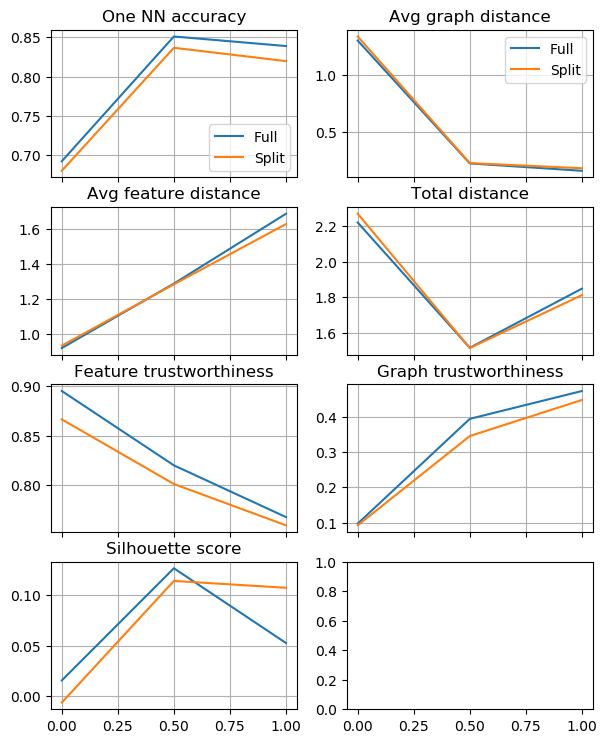

In [17]:
test_range = [0, 0.5, 1]
f, axarr = plt.subplots(4, 2, sharex='col', figsize=(7, 9), dpi=100)
for i, k in enumerate(res_summary.keys()):
    row, col = divmod(i, 2)
    axarr[row, col].plot(test_range, res_summary[k], label="Full")
    axarr[row, col].plot(test_range, res_summary_2[k], label="Split")
    axarr[row, col].set_title(k)
    axarr[row, col].grid()
    axarr[row, col].set_title(k)
    if row==0:
        axarr[row, col].legend()

In [18]:
root = os.path.join(main_dir, dataset_name) + '_' + str(6)
net = load_net_from_root(root, net_parameters)
y_pred = get_net_projection(net, dataset)
plot_graph_embedding(y_pred, dataset.labels, dataset.adj_matrix, line_alpha=0.1)

Data blocks of length:  [2708]
Time to create all data (s) = 0.0262


In [19]:
root = os.path.join(main_dir, dataset_name) + '_' + str(13)
net = load_net_from_root(root, net_parameters)
y_pred = get_net_projection(net, dataset)
plot_graph_embedding(y_pred, dataset.labels, dataset.adj_matrix, line_alpha=0.1)

Data blocks of length:  [2708]
Time to create all data (s) = 0.0250


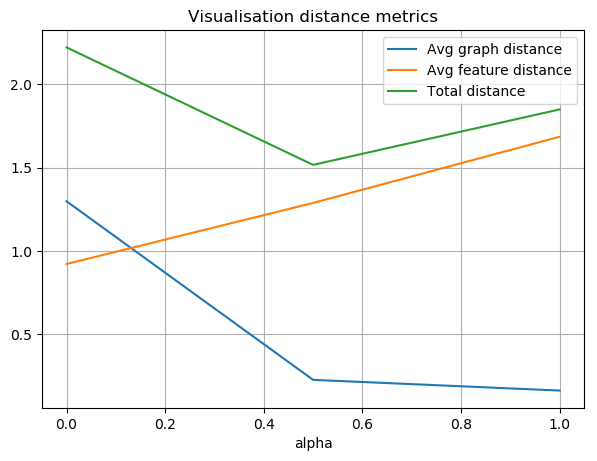

In [21]:
f, axarr = plt.subplots(1, sharex='col', figsize=(7, 5), dpi=100)
plt.plot(test_range, res_summary['Avg graph distance'], label='Avg graph distance')
plt.plot(test_range, res_summary['Avg feature distance'], label='Avg feature distance')
plt.plot(test_range, res_summary['Total distance'], label='Total distance')
plt.xlabel('alpha')
plt.title('Visualisation distance metrics')
plt.grid()
plt.legend()
plt.savefig('destination_path.eps', format='eps', dpi=1000)